In [66]:
import pandas as pd
import numpy as np

#Ploting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

#Machine Learning 
import sklearn

from sklearn.model_selection import StratifiedShuffleSplit #used for splittig the data
from sklearn.impute import SimpleImputer #used to fill null values as median
from sklearn.preprocessing import OneHotEncoder # Converts Catagorical Values
from sklearn.base import BaseEstimator,TransformerMixin #Used in functions to add features to the dataframe
from sklearn.preprocessing import StandardScaler # transform the data

from sklearn.pipeline import Pipeline #do everything in the pipeline at once
from sklearn.pipeline import FeatureUnion #combines pipelines

from sklearn.linear_model import LinearRegression #Create a Linear Regression
from sklearn.tree import DecisionTreeRegressor #Create Decision Tree Model

from sklearn.metrics import mean_squared_error #Metrics for the model
from sklearn.model_selection import cross_val_score #Used to break the training data into 10 different sets and train a model on each set
from sklearn.ensemble import RandomForestRegressor #Used for classifing the 
from sklearn.model_selection import GridSearchCV

# The Data

In [2]:
data = pd.read_csv('/Users/krishna/Documents/Tech/Python/Cali_House_Prices_ML/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### the total_bedrooms has null values

In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23efdc88>,
      dtype=object)

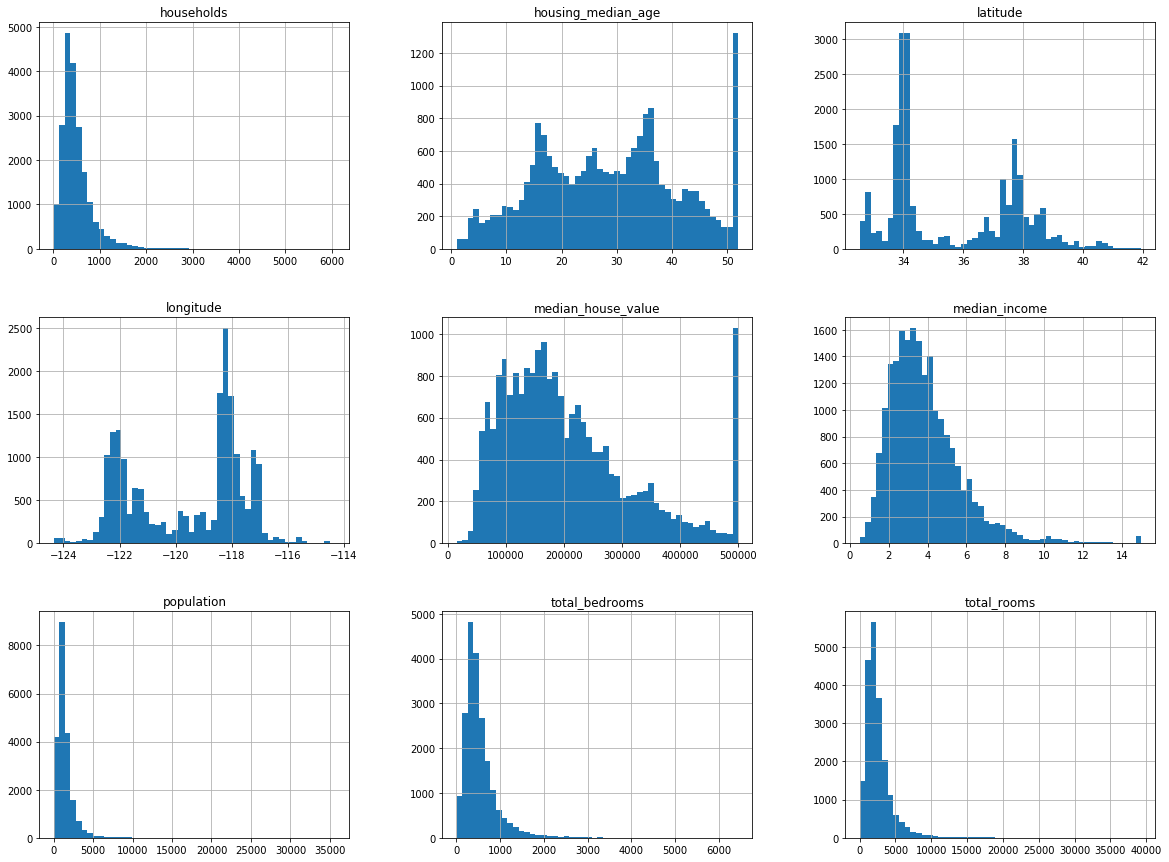

In [6]:
data.hist(bins=50,figsize=(20,15))

# Spliting The Data

In [7]:
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat'] < 5,5, inplace = True)

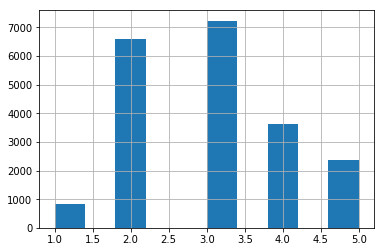

In [8]:
data['income_cat'].hist()

In [9]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2,random_state=23)
for train_index, test_index in split.split(data,data['income_cat']):
    start_train_set = data.loc[train_index]
    start_test_set = data.loc[train_index]

In [10]:
start_test_set['income_cat'].value_counts()/len(start_test_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [11]:
start_train_set = start_train_set.drop('income_cat', axis = 1)
start_test_set = start_test_set.drop('income_cat', axis = 1)

In [12]:
#strat_test_set.to_csv('test.csv')
#strat_train_set.to_csv('train.csv')

# Exploring the Data Set

In [13]:
train_data = pd.read_csv('/Users/krishna/Documents/Tech/Python/Cali_House_Prices_ML/train.csv')
train_data = train_data.rename(columns = {'Unnamed: 0':'block_number'})
train_data = train_data.sort_values(by =['block_number'])
train_data = train_data.set_index('block_number')

In [14]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
block_number,,,,,,,,,,
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


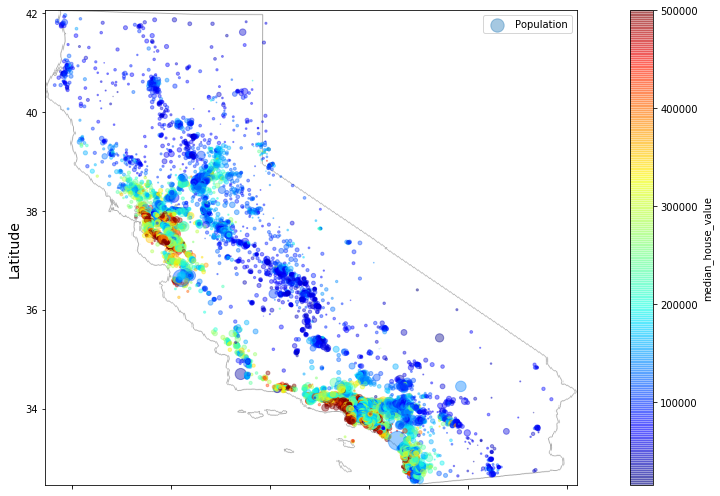

In [15]:
california_img= mpimg.imread('california.png')
train_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                    s=train_data['population']/100, label='Population', figsize = (15,7),
                        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)



plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.tight_layout()
plt.show()

In [16]:
corr_matrix = train_data.corr()
pd.DataFrame(corr_matrix['median_house_value'].sort_values(ascending=False))

,median_house_value
median_house_value,1.000000
median_income,0.687906
total_rooms,0.128825
housing_median_age,0.112329
households,0.062675
total_bedrooms,0.045901
population,-0.027906
longitude,-0.044276
latitude,-0.145248


In [17]:
pd.DataFrame(corr_matrix['median_house_value'].sort_values(ascending=False))[:4]

,median_house_value
median_house_value,1.000000
median_income,0.687906
total_rooms,0.128825
housing_median_age,0.112329


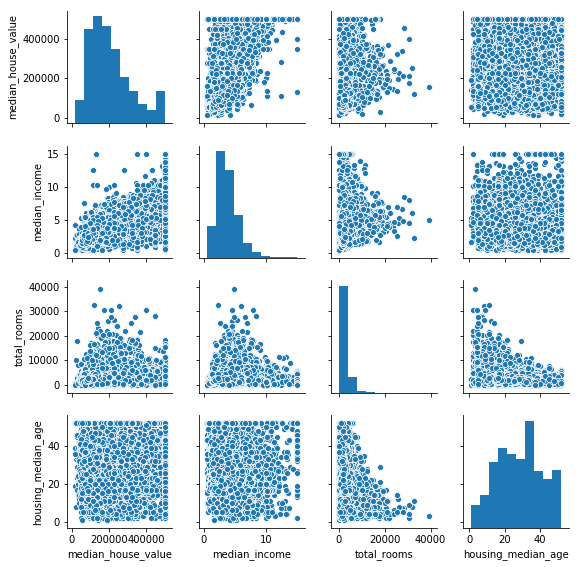

In [18]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(train_data[attributes],height=2)

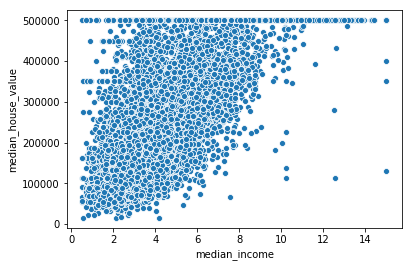

In [19]:
sns.scatterplot(x="median_income", y="median_house_value", data=train_data)

# Experimenting with Attribute Combinations

In [20]:
train_data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
block_number,,,,,,,,,,
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [21]:
train_data['rooms_per_household'] = train_data['total_rooms']/train_data['households']
train_data['bedrooms_per_rooms'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['population_per_household'] = train_data['population']/train_data['households']

In [22]:
train_data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
block_number,,,,,,,,,,,,,
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556


In [23]:
corr_matrix = train_data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687906
rooms_per_household         0.157944
total_rooms                 0.128825
housing_median_age          0.112329
households                  0.062675
total_bedrooms              0.045901
population                 -0.027906
population_per_household   -0.028574
longitude                  -0.044276
latitude                   -0.145248
bedrooms_per_rooms         -0.257179
Name: median_house_value, dtype: float64

# Preparing the Data for Machine Learning Algorithms

In [24]:
housing = pd.read_csv('/Users/krishna/Documents/Tech/Python/Cali_House_Prices_ML/train.csv')
housing_labels = housing['median_house_value']
housing = housing.drop(columns = ['median_house_value'])
housing = housing.rename(columns = {'Unnamed: 0':'block_number'})
housing = housing.set_index('block_number')

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
block_number,,,,,,,,,
9438,-119.98,37.43,12.0,2776.0,592.0,1236.0,489.0,2.5551,INLAND
10383,-117.64,33.62,16.0,3970.0,771.0,1202.0,734.0,3.4115,<1H OCEAN
20021,-119.06,36.08,19.0,2554.0,443.0,1301.0,419.0,4.1856,INLAND
17005,-122.29,37.54,43.0,2268.0,438.0,1151.0,449.0,4.9091,NEAR OCEAN
13029,-121.19,38.67,16.0,1754.0,284.0,773.0,277.0,4.8170,INLAND


In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9438 to 15377
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16346 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [27]:
imputer = SimpleImputer(strategy='median')
housing_num=housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_num = pd.DataFrame(X, columns = housing_num.columns)

In [28]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


# Handling Catagorical Attributes

In [29]:
housing_cat = housing['ocean_proximity']
housing_cat.head(5)

block_number
9438         INLAND
10383     <1H OCEAN
20021        INLAND
17005    NEAR OCEAN
13029        INLAND
Name: ocean_proximity, dtype: object

In [30]:
housing_cat_encoded, housing_catagories =  housing_cat.factorize()

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
block_number,,,,,,,,,
9438,-119.98,37.43,12.0,2776.0,592.0,1236.0,489.0,2.5551,INLAND
10383,-117.64,33.62,16.0,3970.0,771.0,1202.0,734.0,3.4115,<1H OCEAN
20021,-119.06,36.08,19.0,2554.0,443.0,1301.0,419.0,4.1856,INLAND
17005,-122.29,37.54,43.0,2268.0,438.0,1151.0,449.0,4.9091,NEAR OCEAN
13029,-121.19,38.67,16.0,1754.0,284.0,773.0,277.0,4.8170,INLAND


In [32]:
encoder = OneHotEncoder()
housing_cat_onehot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_onehot
housing_cat_onehot.toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
housing_catagories

Index(['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

# Custom Transformers

In [34]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,bedrooms_per_room = True, population_per_household = True):
        self.bedrooms_per_room = bedrooms_per_room
        self.population_per_household = population_per_household
        
    def fit(self,X, y=None):
        return self
    
    def transform(self,X, y = None):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
    
        if self.population_per_household:
            population_per_household = X[:, population_ix] / X[:,households_ix]
            
        if self.bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
        
        if self.population_per_household and self.bedrooms_per_room:
            return np.c_[X, rooms_per_household, bedrooms_per_room, population_per_household]
        elif self.bedrooms_per_room:
            return np.c_[X,rooms_per_household, bedrooms_per_room]
        
        elif self.population_per_household:
            return np.c_[X,rooms_per_household,population_per_household]
        else:
            return np.c_[X,rooms_per_household]

In [35]:
attr_adder = CombinedAttributesAdder(bedrooms_per_room=False, population_per_household=True)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling

In [36]:
# issue total number of rooms range from 6 to 39,320
#   while income ranges from 0 to 15

In [37]:
num_pipeline = Pipeline([
    
    ('imputer', SimpleImputer(strategy = 'median')),
    ('atrribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
pd.DataFrame(housing_num_tr).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.211736,0.847463,-1.317344,0.061251,0.128070,-0.166118,-0.028233,-0.693248,0.106364,-0.007712,-0.049390
1,0.955864,-0.937115,-1.000126,0.602306,0.550285,-0.195612,0.606545,-0.241826,-0.009327,-0.296063,-0.131908
2,0.247321,0.215132,-0.762212,-0.039347,-0.223382,-0.109732,-0.209598,0.166215,0.286938,-0.610194,0.004145
3,-1.364366,0.898986,1.141099,-0.168946,-0.235176,-0.239853,-0.131870,0.547584,-0.163552,-0.312484,-0.046065
4,-0.815494,1.428271,-1.000126,-0.401863,-0.598422,-0.567758,-0.577510,0.499036,0.389036,-0.784837,-0.025005


In [38]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X, y = None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

# Transformation Pipelines

In [39]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
#cat_attribs = ['numeric_conversion']

In [40]:
num_pipeline = Pipeline([
    
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(categories='auto')),    
])

In [41]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [42]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

In [43]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

#### Linear Regression 

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ",lin_reg.predict(some_data_prepared))

Predictions:  [ 83980.1453317  223271.63397949 148117.137839   303593.73865126
 161579.68766099]


In [46]:
print('Lablels:' , list(some_labels))

Lablels: [105000.0, 184800.0, 72100.0, 293200.0, 147000.0]


In [47]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68305.63765638863

#### DecisionTreeRegressor

In [48]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [50]:
## Overfiting of data

# Better Evaluvation Using Cross-Validation

In [51]:
def display_scores(scores):
    print('Scores', scores)
    print('\n')
    print('Mean', scores.mean())
    print('Standard deviation:', scores.std())

In [52]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
display_scores(tree_rmse_scores)

Scores [66339.19820102 69915.59976134 73371.77177941 70568.78625157
 70391.45592265 70613.7516736  71051.61375623 72687.45456684
 69513.30513877 70430.86752684]


Mean 70488.3804578282
Standard deviation: 1788.7580143547914


#### Linear Regression using Cross_Validation

In [56]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [69508.68301632 68196.04329798 69978.10732789 67739.06882388
 66517.44920402 69578.26975264 71012.65715701 67719.98979815
 68989.30965439 67054.61597901]


Mean 68629.41940113013
Standard deviation: 1343.4935409424872


#### Decision Tree Forest Regressor (Numerous Decision Tree)

In [58]:
forest_req = RandomForestRegressor()
forest_req.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_req, housing_prepared, housing_labels,
                               scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores [50459.22100334 51883.51111659 54289.91143309 51373.64712611
 51878.48846529 53167.45821337 52553.88202535 54122.01316955
 52975.54611241 51443.97370443]


Mean 52414.76523695299
Standard deviation: 1172.6714899864712


# Fine Tune the Model

#### Grid Search

In [68]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap' : [False], "n_estimators": [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_req, param_grid, cv=5, scoring = "neg_mean_squared_error")
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [70]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [75]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64164.23898174644 {'max_features': 2, 'n_estimators': 3}
55385.0011344302 {'max_features': 2, 'n_estimators': 10}
52397.26817758367 {'max_features': 2, 'n_estimators': 30}
60062.37304628167 {'max_features': 4, 'n_estimators': 3}
51864.128639813345 {'max_features': 4, 'n_estimators': 10}
49950.56041188582 {'max_features': 4, 'n_estimators': 30}
59198.93288224754 {'max_features': 6, 'n_estimators': 3}
51967.76348986329 {'max_features': 6, 'n_estimators': 10}
49592.98734032996 {'max_features': 6, 'n_estimators': 30}
58173.79026331552 {'max_features': 8, 'n_estimators': 3}
51941.05066107867 {'max_features': 8, 'n_estimators': 10}
49410.46643602235 {'max_features': 8, 'n_estimators': 30}
62776.84951779098 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53844.32583866319 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59324.35817451376 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52457.60151201039 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [77]:
print("This is the best rmse: 49410.46643602235")

This is the best rmse: 49410.46643602235


# Analyze the Best Models and Their Errors

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.34293918e-02, 6.84098205e-02, 4.08971193e-02, 1.45784679e-02,
       1.43426760e-02, 1.52680260e-02, 1.34187348e-02, 3.43917499e-01,
       4.42762087e-02, 8.23483727e-02, 1.11072339e-01, 9.26029523e-03,
       1.61573803e-01, 2.20867635e-04, 2.10844655e-03, 4.87793260e-03])

In [80]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes), reverse = True)

[(0.343917498599832, 'median_income'),
 (0.1615738029350021, 'INLAND'),
 (0.11107233895687403, 'bedrooms_per_room'),
 (0.08234837269577983, 'pop_per_hhold'),
 (0.07342939177084754, 'longitude'),
 (0.06840982046848273, 'latitude'),
 (0.04427620868601092, 'rooms_per_hhold'),
 (0.04089711926042824, 'housing_median_age'),
 (0.015268025973760212, 'population'),
 (0.014578467894659481, 'total_rooms'),
 (0.01434267599189933, 'total_bedrooms'),
 (0.013418734757905709, 'households'),
 (0.009260295226856582, '<1H OCEAN'),
 (0.004877932595532506, 'NEAR OCEAN'),
 (0.0021084465507826625, 'NEAR BAY'),
 (0.00022086763534609206, 'ISLAND')]

# Evaluate the System on Test Set 

In [85]:
final_model = grid_search.best_estimator_
X_test = housing
y_test = housing_labels
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [86]:
final_rmse

18897.14830401055